A stack is a linear data structure that follows the principle of Last In First Out (LIFO).

The operations in stack:
1. Push operation ==> Insert data (only at the end or top)
2. Pop operation ==> Remove and return data (only at the end or top)
3. Peek operation ==> Read data (only at the end or top)

Some additional:
1. isEmpty ==> Check if the stack is empty
2. isFull ==> Check if the stack is full
3. top ==> Get last inserted element without removing it.
4. size ==> Get the size of stack.

NOTE: Stack can be either static or dynamic in size.

Stack is Abstract Data Type (ADT) which means a type of class (or an object) that has its own operations but do not specify how these operations should be implemented.

Because it is ADT, we can implement the behavior of operations (such as push, pop) using array, linked list, or any data structure.

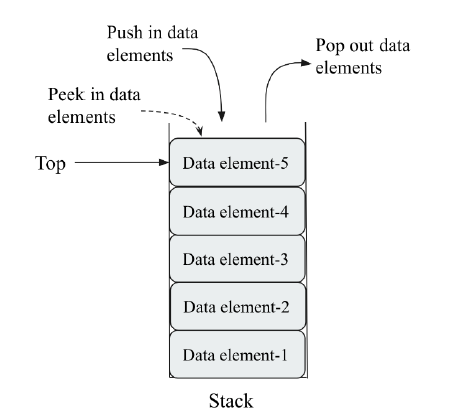

#  Stack Implementation Using Arrays

In [31]:
class Stack:
    '''
    The element at index array.length -> Top
    
    Approximation assume the size is static (determined).
    '''
    def __init__(self, size=3):
        self.size = size
        self.top = -1
        self.data = [None] * size
    
    def push(self, x):
        if self.top >= self.size - 1:
            print("Stack Overflow")
        else:
            self.top += 1
            self.data[self.top] = x
            
    def pop(self):
        if self.top == -1:
            print("Stack Underflow")
        else:
            self.data[self.top] = None
            self.top -= 1
            return self.data[self.top + 1]
    
    def peek(self):
        if self.top == -1:
            print("Stack is empty")
        else:
            return self.data[self.top]
        
    def isEmpty(self):
        return self.top == -1
    
    def isFull(self):
        return self.size == self.top + 1
    
    

Performance & Limitations:

- Space complexity (for n push operations) : O(n)
- Time complexity of push                  : O(1)
- Time complexity of pop                   : O(1)
- Time complexity of isEmpty               : O(1)
- Time complexity of isFull                : O(1)
- Time complexity of delete                : O(1)


# Dynamic Array Implementation

# Stack Implementation Using LinkedList

In [32]:
# This approach basically for dynamic size

class Stack:
    '''
    The head -> top
    '''
    class Node:
        def __init__(self, data):
            self.data = data
            self.next = None
    
    def __init__(self):
        self.top = None
        self.size = 0
    
    def push(self, data):
        newNode = self.Node(data)
        if self.top:
            newNode.next = self.top
            self.top = newNode
        else:
            self.top = newNode
        
        self.size += 1
        
    def pop(self):
        if self.top:
            data = self.top.data
            self.size -= 1
            if self.top.next:
                self.top = self.top.next
            else:
                self.top = None
            return data
        else:
            print("Stack is empty")
            
            
    def peek(self):
        if self.top:
            return self.top.data
        else:
            print("Stack is empty")

# Problem Solving

In [24]:
# 1. How stacks can be used for checking balancing of symbols.

# The concept is we define stack that store the opening delimiter 
#  such as "(", "{", or "[". Once the closing delimiter is encountered
#  then the stack is popped and compared the opening and closing delimiters.
#  If they match, continue the process. If they do not match return False.

# Algorithm
# 1. Create a stack
# 2. While (end of input is not reached) {
#       1. If the character is not delimiters, ignore it.
#       2. If the character is an opening symbols, push it onto the stack
#       3. If it a closing symbols, then -> if the stack empty return False.
#           else pop the stack
#       4. If the symbol popped is not the corresponding opening symbol, return False
# }
# 3. At the end, if the stack is not empty return False.

def isValidExpression(expression):
    stack = []
    for i in range(len(expression)):
        if (expression[i] == '(') or (expression[i] == '{') or (expression[i] == '['):
            stack.append(expression[i])
        elif (expression[i] == ')') or (expression[i] == '}') or (expression[i] == ']'):
            if (len(stack) == 0):
                return False
            else:
                currentExpression = stack.pop() + expression[i] 
                if (currentExpression == '()') or (currentExpression == '[]') or (currentExpression == '{}'):
                    continue
                else:
                    return False
    if len(stack) > 0:
        return False
    return True


expr = '(A+B)+(C-D)'
print(isValidExpression(expr))
expr = '((A+B)+(C-D)'
print(isValidExpression(expr))
expr = '((A+B)+[C-D])'
print(isValidExpression(expr))
expr = '((A+B)+[C-D]}'
print(isValidExpression(expr))

True
False
True
False


In [66]:
# Convert inflix to prefix
# 1. Create stack
# 2. For t in each character {
#      1. if t is operand:
#          add to result
#      2. Else if t is ')':
#          pop stack, then if popped not parentheses add to result until
#           popped stack is '('
#      3. Else (t is operator or left parentheses):
#          1. if t is left paretheses or stack empty, then push stack
#          2. else:
#              pop and add to result until of the popped priority is lower
#              than t (and stack is not empty).
# }
# 3. Pop and add to result all the element left in stack.


def inflixToPrefix(chars):
    # Priorirty
    prec = {}
    prec['*'] = 3
    prec['/'] = 3
    prec['+'] = 2
    prec['-'] = 2
    prec['('] = 1
    
    stack = []
    result = ''
    
    for t in chars:
        if t in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' or t in '0123456789':
            result = result + t
        elif t == '(':
            stack.append(t)
        elif t == ')':
            top = stack.pop()
            while top != '(':
                result = result + top
                top = stack.pop()
        else:
            while (len(stack) != 0) and (prec[stack[-1]] >= prec[t]):
                result = result + stack.pop()
            stack.append(t)
    while (len(stack) > 0):
        result = result + stack.pop()
    
    return result

test = 'A*B-(C+D)+E'
print(inflixToPrefix(test))
test = '(A+B/C*(D+E)-F)'
print(inflixToPrefix(test))

AB*CD+-E+
ABC/DE+*+F-


In [71]:
# Postfix evaluation
# 1. Create stack
# 2. For t in each character {
#      1. if t is operand:
#          push stack
#      2. if t is operator:
#          1. if the operator is unary:
#              pop stack then apply the operator. Result is push to stack.
#          2. if the operator is binary:
#              pop two elements from stack then apply the operator. Result
#               is push to stack.
# }
# 3. Return the top stack.
# NOTE: The final stack will only contain one element.

def postfixEval(expr):
    stack = []
    for t in expr:
        if t in '0123456789':
            stack.append(t)
        else:
            operand2 = int(stack.pop())
            operand1 = int(stack.pop())
            result = doMath(t, operand1, operand2)
            stack.append(result)
    return stack.pop()

def doMath(op, op1, op2):
    if op == '*':
        return op1 * op2
    elif op == '/':
        return op1 / op2
    elif op == '+':
        return op1 + op2
    else:
        return op1 - op2

print(postfixEval('123*+5-'))

2


In [80]:
# How to design a stack such that GetMinimum should be O(1)?
# We can create two stack, the first one is main stack
#  and the second is auxiliary stack that maintain the minimum of
#  all values in the stack.

class Stack:
    def __init__(self):
        self.size = 0
        self.top = -1
        self.main = []
        self.minStack = []
        
    def push(self, data):
        self.size += 1
        self.main.append(data)
        if (not self.minStack):
            self.minStack.append(data)
        elif (self.minStack[-1] > data):
            self.minStack.append(data)
        else:
            self.minStack.append(self.minStack[-1])
    
    def peek(self):
        return self.main[-1]
    
    def pop(self):
        if self.size == 0:
            return None
        self.size -= 1
        self.minStack.pop()
        return self.main.pop()
    
    def getMin(self):
        if self.size == 0:
            return None
        return self.minStack[-1]

stack = Stack()
stack.push(2)
stack.push(6)
stack.push(4)
stack.push(1)
stack.push(5)
stack.push(1)

In [82]:
# For previous problem is it possible to improve the space complexity?
# From previous problem, space complexity of aux stack is O(n). We can
# reduce it by remove the duplicates.

class Stack:
    def __init__(self):
        self.size = 0
        self.top = -1
        self.main = []
        self.minStack = []
        
    def push(self, data):
        self.size += 1
        self.main.append(data)
        if (not self.minStack):
            self.minStack.append(data)
        elif (self.minStack[-1] > data):
            self.minStack.append(data)
    
    def peek(self):
        return self.main[-1]
    
    def pop(self):
        if self.size == 0:
            return None
        self.size -= 1
        temp = self.main.pop()
        if temp == self.minStack[-1]:
            self.minStack.pop()
        return temp
    
    def getMin(self):
        if self.size == 0:
            return None
        return self.minStack[-1]

    
stack = Stack()
stack.push(2)
stack.push(6)
stack.push(4)
stack.push(1)
stack.push(5)
stack.push(1)

1

In [89]:
# Given an array of characters formed with a’s and b’s. 
#   The string is marked with special character X which represents the
#   middle of the list (for example: ababa…ababXbabab…..baaa). 
#   Check whether the string is palindrome.

def isPalindrome(chars):
    stack = []
    result = False
    for c in chars:
        stack.append(c)
    for c in chars:
        if c == stack.pop():
            result = True
        else:
            return False
    return result

print(isPalindrome('racecar'))

# NOTE:
# Time complexity = O(n)
# Space complexity = O(n)

True


In [88]:
# Alternative is Palindrome using recursive
def isPalindrome(text):
    if (len(text) <= 1):
        return True
    if(text[0] == text[-1]):
        return isPalindrome(text[1:-1])    
    return False

print(isPalindrome('racecar'))

# NOTE:
# Time complexity = O(n)
# Space complexity = O(1)

True


In [5]:
# Check for balanced bracket expression

def isBracketBalance(text):
    stack = []
    
    for i in range(len(text)):
        if (text[i] == '(') or (text[i] == '{') or (text[i] == '['):
            stack.append(text[i])
        
        else:
            compare = stack.pop() + text[i]
            if (compare == '()') or (compare == '{}') or (compare == '[]'):
                continue
            else:
                return False
    return True


expr = "{()}[]"
isBracketBalance(expr)

True

In [20]:
# Length of longest balanced parentheses prefix

def lenParentheses(text):
    n = len(text)
    balance = 0
    max_len = 0
    
    for i in range(n):
        if text[i] == '(':
            balance += 1
        else:
            balance -= 1
        if balance < 0:
            balance = 0
            max_len = i + 1
        elif balance == 0:
            max_len = max(i + 1, max_len)
            
    return max_len


text = "()(())((()"
lenParentheses(text)

6